In [2]:
%pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt


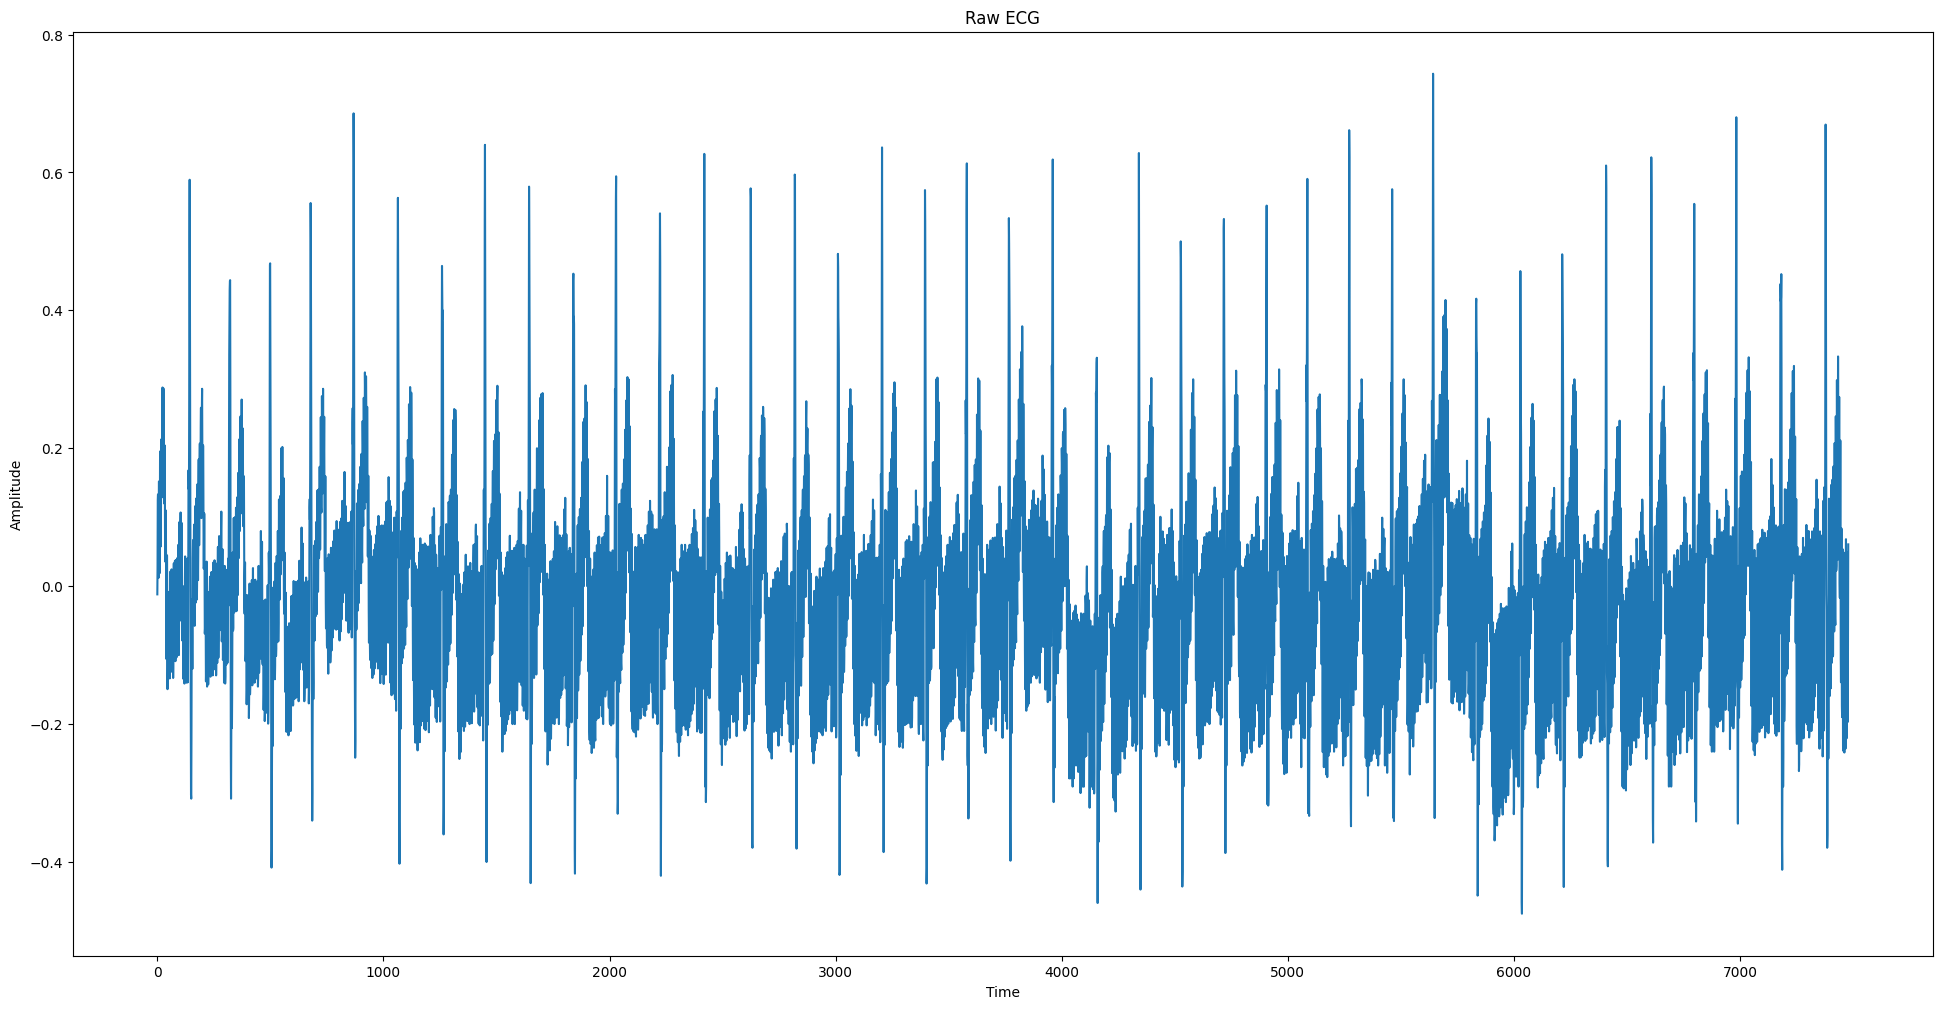

[ 0.00035276  0.00227397  0.00833001 ... -0.00929328 -0.01427175
 -0.0141268 ]


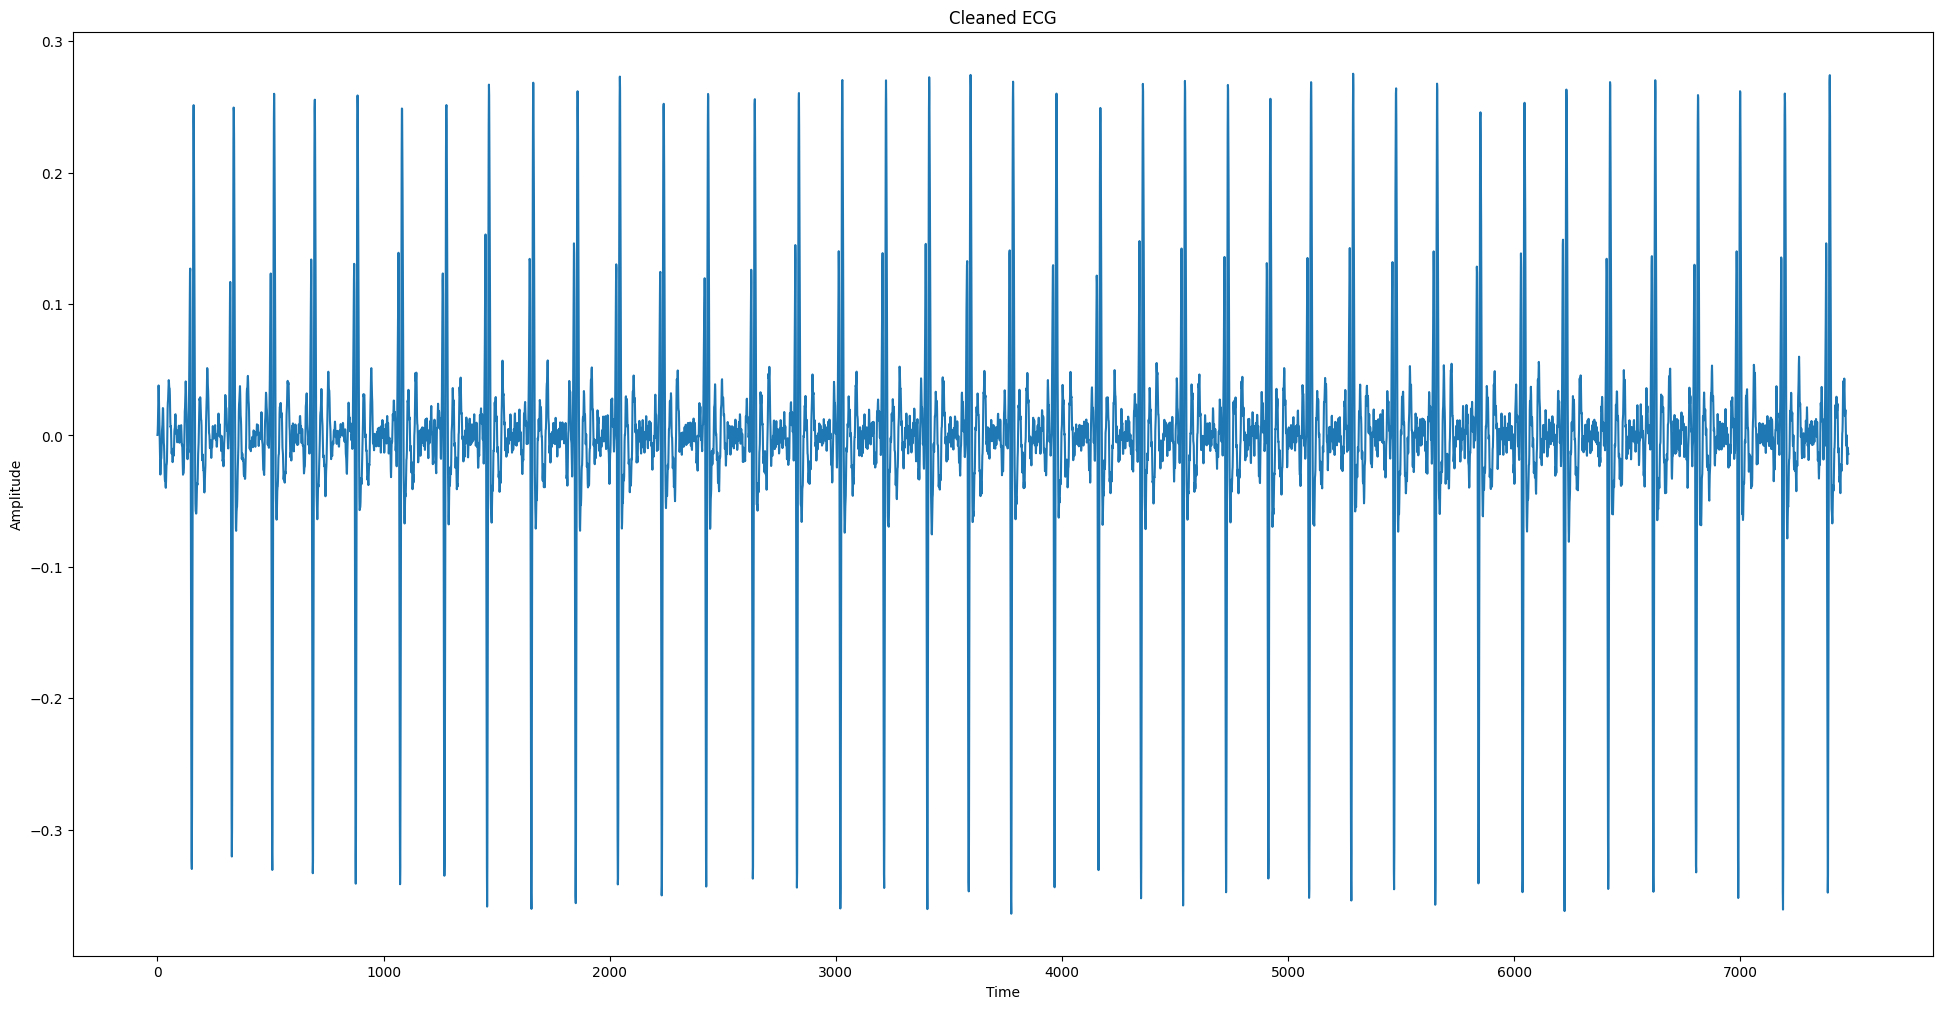

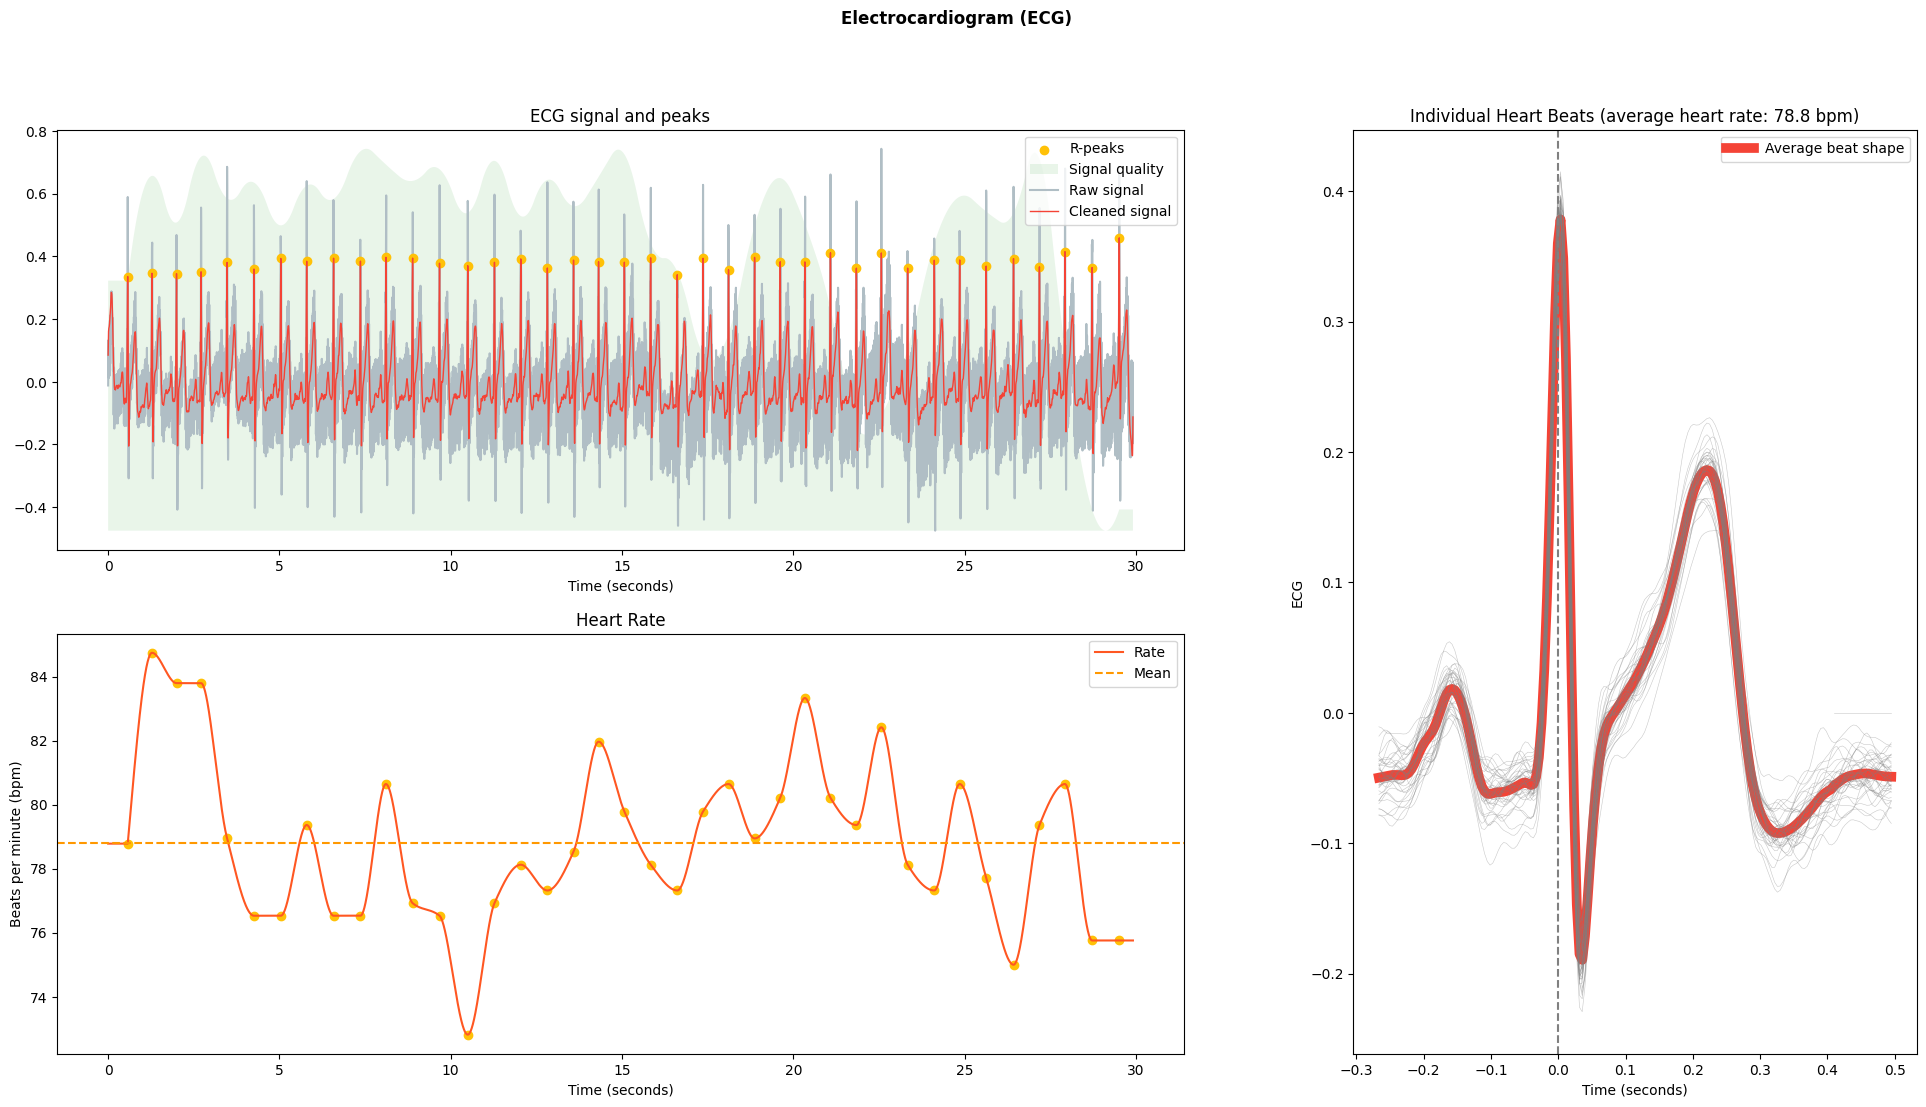

In [2]:
# read data from ecg.txt
data = pd.read_csv('ecg2.txt', delimiter='\t')

ecg = data.values[:, 0]
if ecg.max() > 100:
    ecg = (ecg - 2000) / (40 * 40)
# print(ecg)
# ecg = ecg[0:1000]
# plot raw ecg with title x and y axis
plt.figure(figsize=(24, 12))
plt.plot(ecg)
plt.title('Raw ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# # Process the ECG signal
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010")
print(ecg_cleaned)  
# print(ecg_cleaned)

# # Plot the cleaned ECG signal more wider
plt.figure(figsize=(24, 12))
plt.plot(ecg_cleaned)
plt.title('Cleaned ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()



# signals, info = nk.ecg_process(ecg, sampling_rate=250)
# # signals, info = nk.ecg_peaks(ecg, sampling_rate=250, correct_artifacts=True, show=True)
# Define a new function
def my_processing(ecg_signal):
    # Do processing
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=250, method="neurokit")
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=250)
    rate = nk.ecg_rate(rpeaks, sampling_rate=250, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=250)

    # Prepare output
    signals = pd.DataFrame({"ECG_Raw": ecg_signal,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})
    signals = pd.concat([signals, instant_peaks], axis=1)

    # Create info dict
    info = rpeaks
    info["sampling_rate"] = 250
    
    return signals, info

signals, info = my_processing(ecg)

nk.ecg_plot(signals, info)
fig = plt.gcf()
fig.set_size_inches(24, 12, forward=True)


Excellent


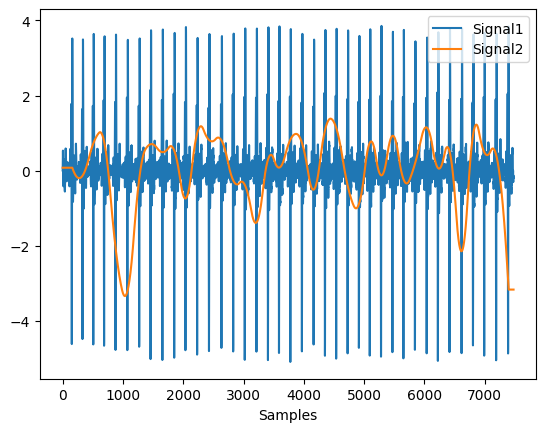

In [8]:
## Verification of the quality of the ECG signal
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010")

quality = nk.ecg_quality(ecg_cleaned, sampling_rate=250)

nk.signal_plot([ecg_cleaned, quality], standardize=True)
fig = plt.gcf()
fig.savefig("myfig.png")
# @savefig p_signal_plot1.png scale=100%
print(nk.ecg_quality(ecg_cleaned,

               sampling_rate=250,

               method="zhao2018",

               approach="fuzzy"))

## Extract and Visualize Individual Heartbeats

<Figure size 2000x400 with 0 Axes>

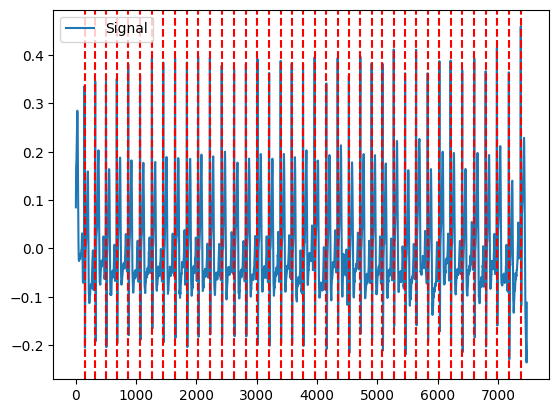

In [9]:
signals, info = nk.ecg_process(ecg, sampling_rate=250)
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

# Create a figure with a larger size
plt.figure(figsize=(20, 4))  # Adjust the width and height as needed
nk.events_plot(rpeaks, cleaned_ecg)
plt.show()

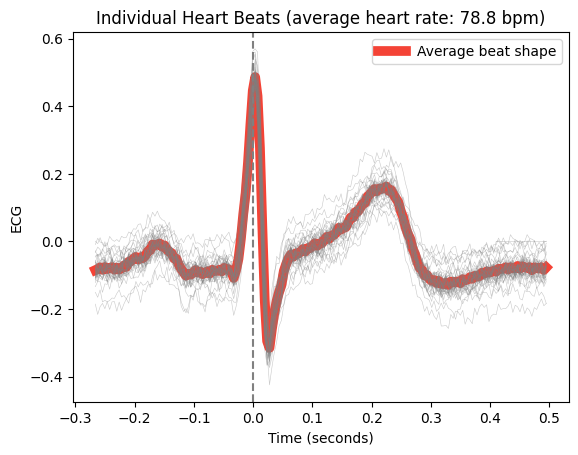

In [12]:
cleaned_ecg = nk.ecg_clean(ecg, sampling_rate=250, method="engzeemod2012")
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=250, show=True)

In [13]:
# Define a function to create epochs
def extract_heartbeats(cleaned, peaks, sampling_rate=None): 
    heartbeats = nk.epochs_create(cleaned, 
                                  events=peaks, 
                                  epochs_start=-0.3, 
                                  epochs_end=0.4, 
                                  sampling_rate=sampling_rate)
    heartbeats = nk.epochs_to_df(heartbeats)
    return heartbeats
    
heartbeats = extract_heartbeats(cleaned_ecg, peaks=rpeaks, sampling_rate=250)
heartbeats.head()

,Signal,Index,Label,Time
0,-0.036882,68,1,-0.300000
1,-0.057042,69,1,-0.295977
2,-0.063938,70,1,-0.291954
3,-0.065177,71,1,-0.287931
4,-0.043217,72,1,-0.283908


In [14]:
heartbeats_pivoted = heartbeats.pivot(index='Time', columns='Label', values='Signal')
heartbeats_pivoted.head()

Label,1,10,11,12,13,14,15,16,17,18,...,36,37,38,39,4,5,6,7,8,9
Time,,,,,,,,,,,,,,,,,,,,,
-0.300000,-0.036882,-0.063940,-0.068792,-0.065513,-0.095304,-0.086266,-0.074939,-0.111914,-0.082376,-0.105183,...,-0.088475,-0.061474,-0.064894,-0.054435,-0.078858,0.020198,-0.023810,-0.072557,-0.069537,-0.083737
-0.295977,-0.057042,-0.063773,-0.073275,-0.082695,-0.070969,-0.101983,-0.089500,-0.090717,-0.094423,-0.064715,...,-0.090729,-0.043494,-0.072644,-0.085699,-0.099868,0.009061,-0.029405,-0.075066,-0.082626,-0.072212
-0.291954,-0.063938,-0.065273,-0.055655,-0.067960,-0.114338,-0.088781,-0.107587,-0.106101,-0.062022,-0.066807,...,-0.080164,-0.067901,-0.083048,-0.095529,-0.088918,0.006728,-0.012796,-0.097474,-0.067285,-0.093059
-0.287931,-0.065177,-0.047811,-0.074188,-0.090484,-0.113568,-0.064559,-0.104189,-0.101786,-0.073816,-0.075258,...,-0.091297,-0.052598,-0.059748,-0.108891,-0.082773,0.002428,-0.032794,-0.062422,-0.074061,-0.087180
-0.283908,-0.043217,-0.069780,-0.056570,-0.079011,-0.096446,-0.083632,-0.128009,-0.114398,-0.076021,-0.057394,...,-0.064504,-0.069672,-0.079509,-0.111788,-0.094877,-0.014460,-0.023169,-0.061256,-0.057452,-0.074623


In [15]:
import numpy as np

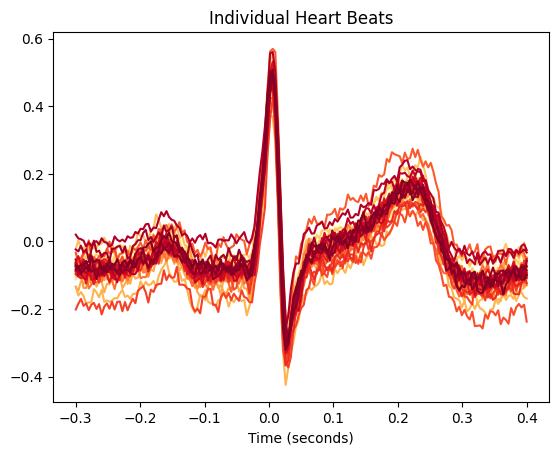

In [16]:
# Prepare figure
fig, ax = plt.subplots()

ax.set_title("Individual Heart Beats")
ax.set_xlabel("Time (seconds)")

# Aesthetics
labels = list(heartbeats_pivoted)
labels = ['Channel ' + x for x in labels] # Set labels for each signal
cmap = iter(plt.cm.YlOrRd(np.linspace(0,1, int(heartbeats["Label"].nunique())))) # Get color map
lines = [] # Create empty list to contain the plot of each signal

for i, x, color in zip(labels, heartbeats_pivoted, cmap):
    line, = ax.plot(heartbeats_pivoted[x], label='%s' % i, color=color)
    lines.append(line)

In [ ]:
# Import packages
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import mplcursors

# Obtain hover cursor
mplcursors.cursor(lines, hover=True, highlight=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label())) 
# Return figure
fig

In [12]:
pip install mplcursors

Note: you may need to restart the kernel to use updated packages.


   -0.078125
0  -0.111250
1  -0.140000
2  -0.126875
3  -0.119375
4  -0.140000
rpeaks is not noe
0.29473456238777695
Heart Rate:  71.25055110561034


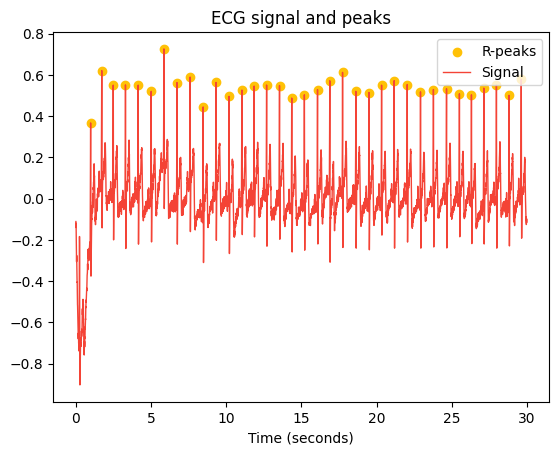

In [ ]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the .txt file into a DataFrame
data = pd.read_csv("ecg_data.txt", delimiter="\t")

print(data.head())

'''
 0.231875
0  0.238750
1  0.270625
2  0.469375
3  0.668750
4  0.963750
      ECG_R_Peaks
0               0
1               0
2               0
3               0
4               0
...           ...
7494            0
7495            0
7496            0
7497            0
7498            0

[7499 rows x 1 columns]
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 197,  379,  559,  740,  920, 1110, 1315, 1527, 1740, 1941, 2147,
       2356, 2562, 2762, 2962, 3162, 3362, 3563, 3773, 3993, 4214, 4424,
       4625, 4831, 5045, 5249, 5445, 5632, 5816, 6020, 6226, 6432, 6647,
       6867, 7084, 7293]), 'ECG_R_Peaks_Uncorrected': array([ 197,  379,  559,  740,  920, 1110, 1315, 1527, 1740, 1941, 2147,
       2356, 2562, 2762, 2962, 3162, 3362, 3563, 3773, 3993, 4214, 4424,
...
       -0.52884615,  0.24038462,  0.38461538, -0.48076923, -0.48076923,
       -0.38461538, -0.14423077,  0.96153846,  0.96153846,  0.        ,
        0.        ,  0.24038462, -0.14423077, -0.38461538, -0.14423077,
        0.24038462]), 'ECG_fixpeaks_c1': 0.13, 'ECG_fixpeaks_c2': 0.17, 'sampling_rate': 150}
        '''
# ecg = nk.ecg_simulate(duration=15, sampling_rate=250, heart_rate=80)\
ecg = data.values[:, 0]
# ecg = nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985")


# ecg[600:950] = ecg[600:950] + np.random.normal(0, 0.6, 350)

signals, info = nk.ecg_peaks(ecg, sampling_rate=250, correct_artifacts=True, show=True)

ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010")
# plt.plot(ecg)
# plt.scatter(info["ECG_R_Peaks"], ecg[info["ECG_R_Peaks"]], color="red")

# ecg_sim = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80, noise = 0.05)
# plt.plot(ecg_sim[:1000])
# plt.show()
# plt.plot(ecg[1000:1500])
# plt.show()

signals, info = nk.ecg_process(ecg, sampling_rate=250)
rpeaks = info["ECG_R_Peaks"]

def ecg_segment_window(
    heart_rate=None,
    rpeaks=None,
    sampling_rate=1000,
    desired_length=None,
    ratio_pre=0.35,
):
    # Extract heart rate
    if heart_rate is not None:
        heart_rate = np.mean(heart_rate)
    if rpeaks is not None:
        heart_rate = np.mean(
            nk.signal_rate(
                rpeaks, sampling_rate=sampling_rate, desired_length=desired_length
            )
        )
        

    # Modulator
    # Note: this is based on quick internal testing but could be improved
    window_size = 60 / heart_rate  # Beats per second

    # Window
    epochs_start = ratio_pre * window_size
    
    epochs_end = (1 - ratio_pre) * window_size

    return -epochs_start, epochs_end, heart_rate
# signals, info = nk.ecg_process(ecg, sampling_rate=1000)

epochs_start, epochs_end, average_hr = ecg_segment_window(
        rpeaks=rpeaks, sampling_rate=250, desired_length=len(ecg_cleaned)
    )

print ("Heart Rate: ", average_hr)
# nk.ecg_plot(signals, info)